In [1]:
#install.packages("RSQLite")

In [1]:
#options(repr.plot.width=8,repr.plot.height=4)

In [2]:
library(DBI)
con <- dbConnect(RSQLite::SQLite(), "datasets/wjazzd.db")

## Canciones por estilo

In [3]:
solos <- dbReadTable(con, "solo_info")

In [4]:
solos.styles <- data.frame(table(solos$style))
colnames(solos.styles)[1] <- 'Style'
solos.styles

Style,Freq
BEBOP,56
COOL,54
FREE,5
FUSION,20
HARDBOP,76
POSTBOP,147
SWING,66
TRADITIONAL,32


## Canciones por métrica

In [5]:
solos.metrics <- data.frame(table(solos$signature))
colnames(solos.metrics)[1] <- 'Metric'
solos.metrics

Metric,Freq
,8
3/4,8
4/4,435
5/4,1
6/4,1
6/8,1
9/4,2


Queremos ver si los estilos se diferencian por la distribución de notas en el compás. Considerando la distribución desproporcionada de canciones en 4/4, nos restringimos a este subconjunto de solos.

In [6]:
solos.44 <- solos[solos$signature == '4/4',]

In [7]:
melody <- dbReadTable(con, 'melody')

In [8]:
melody.44 <- melody[melody$melid %in% solos.44$melid,]

In [9]:
x <- merge(melody.44, solos.44, by.x='melid', by.y='melid') # Unimos las notas con el estilo de la canción a la que 
duration.and.style <- x[c('melid', 'duration', 'style')]

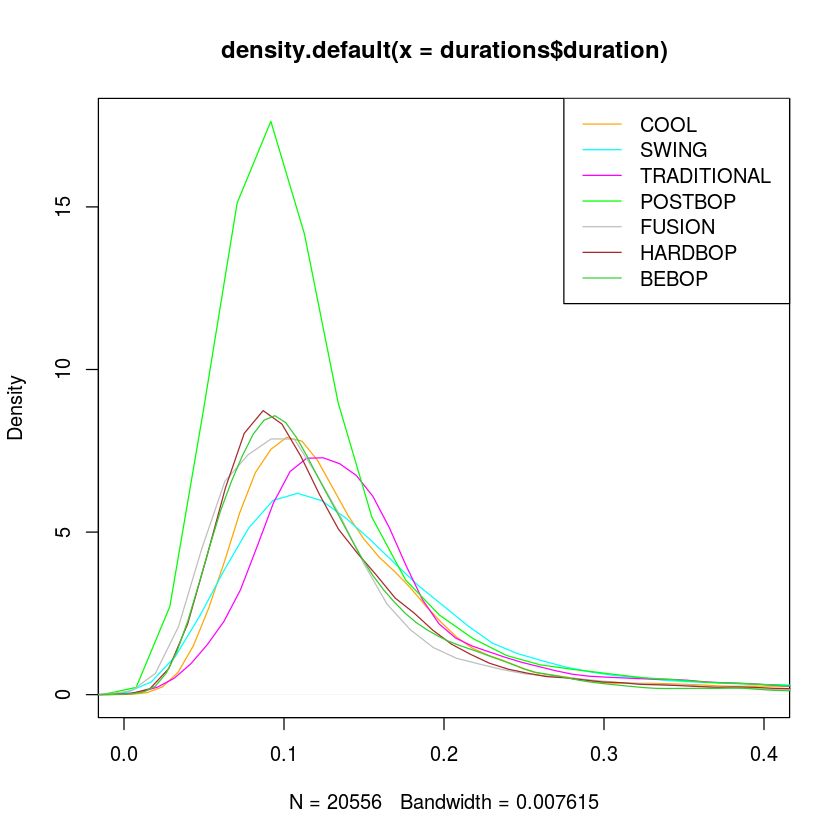

In [48]:
styles <- unique(solos.44$style)
cols = c('orange', 'cyan', 'magenta', 'green', 'grey', 'brown', 'limegreen')
ymax = 0
for (style_idx in 1:length(styles)) {
    style <- styles[style_idx]
    durations <- duration.and.style[duration.and.style$style == style,]
    ymax = max(density(durations$duration)$y, ymax)
}
for (style_idx in 1:length(styles)) {
    style <- styles[style_idx]
    durations <- duration.and.style[duration.and.style$style == style,]
    d <- density(durations$duration)
    if (style_idx == 1) {
        plot(d, ylim=c(0, ymax), xlim=c(0, 0.4), col=cols[style_idx])
    } else {
        lines(d, col=cols[style_idx])
    }
}
legend('topright', legend=styles, lty=rep(1, length(styles)), lwd=rep(1, length(styles)), col=cols)